In [39]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [41]:
#Carga de dataset
data = pd.read_csv('pizza_v1.csv')

In [42]:
print(data)

    company price_rupiah  diameter      topping           variant     size  \
0         A    Rp235,000      22.0      chicken  double_signature    jumbo   
1         A    Rp198,000      20.0    papperoni  double_signature    jumbo   
2         A    Rp120,000      16.0    mushrooms  double_signature  reguler   
3         A    Rp155,000      14.0  smoked beef  double_signature  reguler   
4         A    Rp248,000      18.0   mozzarella  double_signature    jumbo   
..      ...          ...       ...          ...               ...      ...   
124       E     Rp39,000       8.5         tuna        spicy tuna    small   
125       E     Rp72,000      12.0         tuna        spicy tuna   medium   
126       E     Rp99,000      14.0         tuna        spicy tuna    large   
127       E     Rp44,000       8.5         meat   BBQ_meat_fiesta    small   
128       E     Rp78,000      12.0         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese  
0           yes          yes  
1

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [44]:
# Lista con el nuevo orden de las columnas
nuevo_orden_columnas = ['company', 'diameter', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'price_rupiah']  # Agrega las demás columnas

# Reordena las columnas del DataFrame según el nuevo orden
data = data[nuevo_orden_columnas]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price_rupiah  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [46]:
columnas_eliminar = ['price_rupiah']
simbolo = 'Rp'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [47]:
print(data)

    company  diameter      topping           variant     size extra_sauce  \
0         A      22.0      chicken  double_signature    jumbo         yes   
1         A      20.0    papperoni  double_signature    jumbo         yes   
2         A      16.0    mushrooms  double_signature  reguler         yes   
3         A      14.0  smoked beef  double_signature  reguler         yes   
4         A      18.0   mozzarella  double_signature    jumbo         yes   
..      ...       ...          ...               ...      ...         ...   
124       E       8.5         tuna        spicy tuna    small         yes   
125       E      12.0         tuna        spicy tuna   medium         yes   
126       E      14.0         tuna        spicy tuna    large         yes   
127       E       8.5         meat   BBQ_meat_fiesta    small         yes   
128       E      12.0         meat   BBQ_meat_fiesta   medium          no   

    extra_cheese price_rupiah  
0            yes      235,000  
1          

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price_rupiah  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [49]:
columnas_eliminar = ['price_rupiah']
simbolo = ',000'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [50]:
print(data)

    company  diameter      topping           variant     size extra_sauce  \
0         A      22.0      chicken  double_signature    jumbo         yes   
1         A      20.0    papperoni  double_signature    jumbo         yes   
2         A      16.0    mushrooms  double_signature  reguler         yes   
3         A      14.0  smoked beef  double_signature  reguler         yes   
4         A      18.0   mozzarella  double_signature    jumbo         yes   
..      ...       ...          ...               ...      ...         ...   
124       E       8.5         tuna        spicy tuna    small         yes   
125       E      12.0         tuna        spicy tuna   medium         yes   
126       E      14.0         tuna        spicy tuna    large         yes   
127       E       8.5         meat   BBQ_meat_fiesta    small         yes   
128       E      12.0         meat   BBQ_meat_fiesta   medium          no   

    extra_cheese price_rupiah  
0            yes          235  
1          

In [51]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'price_rupiah'
columna_numerica = 'price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price         124 non-null    float64
dtypes: float64(2), object(6)
memory usage: 8.2+ KB


In [53]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [54]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [55]:
#resultado
print(data)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese  \
0          0      22.0        2        8     1            1             1   
1          0      20.0        7        8     1            1             1   
2          0      16.0        5        8     4            1             1   
3          0      14.0        9        8     4            1             0   
4          0      18.0        4        8     1            1             0   
..       ...       ...      ...      ...   ...          ...           ...   
124        4       8.5       10       16     5            1             1   
125        4      12.0       10       16     3            1             1   
126        4      14.0       10       16     2            1             1   
127        4       8.5        3        0     5            1             0   
128        4      12.0        3        0     3            0             0   

     price  
0    235.0  
1    198.0  
2    120.0  
3    155.0  
4    248.0

In [56]:
#llenar datos vacios
columnas_especificas = ['price']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int32  
 1   diameter      129 non-null    float64
 2   topping       129 non-null    int32  
 3   variant       129 non-null    int32  
 4   size          129 non-null    int32  
 5   extra_sauce   129 non-null    int32  
 6   extra_cheese  129 non-null    int32  
 7   price         129 non-null    float64
dtypes: float64(2), int32(6)
memory usage: 5.2 KB


In [58]:
# Lectura de Datos
# y es la sexta columna ya que es la columna de precios
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [59]:
print(X)
print('*'*25)
print(y)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese
0          0      22.0        2        8     1            1             1
1          0      20.0        7        8     1            1             1
2          0      16.0        5        8     4            1             1
3          0      14.0        9        8     4            1             0
4          0      18.0        4        8     1            1             0
..       ...       ...      ...      ...   ...          ...           ...
124        4       8.5       10       16     5            1             1
125        4      12.0       10       16     3            1             1
126        4      14.0       10       16     2            1             1
127        4       8.5        3        0     5            1             0
128        4      12.0        3        0     3            0             0

[129 rows x 7 columns]
*************************
0      235.0
1      198.0
2      120.0
3      155.0
4      248

In [60]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [61]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese
0          0      22.0        2        8     1            1             1
1          0      20.0        7        8     1            1             1
2          0      16.0        5        8     4            1             1
3          0      14.0        9        8     4            1             0
4          0      18.0        4        8     1            1             0
..       ...       ...      ...      ...   ...          ...           ...
124        4       8.5       10       16     5            1             1
125        4      12.0       10       16     3            1             1
126        4      14.0       10       16     2            1             1
127        4       8.5        3        0     5            1             0
128        4      12.0        3        0     3            0             0

[129 rows x 7 columns]
Media calculada: company          2.046512
diameter        12.976744
topping          5.

In [62]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [63]:
print(X)

[[ 1.         -1.43132011  2.76790034 ... -1.27547153  0.83508588
   0.70710678]
 [ 1.         -1.43132011  2.15439665 ... -1.27547153  0.83508588
   0.70710678]
 [ 1.         -1.43132011  0.92738929 ...  0.7726923   0.83508588
   0.70710678]
 ...
 [ 1.          1.3662601   0.31388561 ... -0.59275026  0.83508588
   0.70710678]
 [ 1.          1.3662601  -1.37324952 ...  1.45541357  0.83508588
  -1.41421356]
 [ 1.          1.3662601  -0.29961808 ...  0.08997102 -1.19748163
  -1.41421356]]


In [64]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [65]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: {:s} [ 6.84128227e+01 -7.37881251e+00  2.19078626e+01 -8.69919155e-01
 -1.44590326e-02 -7.13388840e+00  5.29654643e+00 -1.63570690e+00]
El valor predecido (usando el descenso por el gradiente): 139.4362


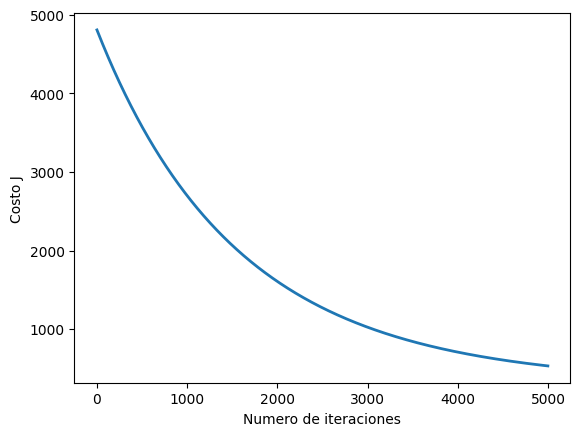

In [66]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0003
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}' ,theta)

# Estimar el precio para un vino con distintas caracteristicas
X_array = [1, 0, 20, 2, 8, 1, 1, 1]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido (usando el descenso por el gradiente): {:.4f}'.format(price))

In [67]:
# Calcula los parámetros theta usando la ecuación normal
X_transpose = np.transpose(X)
X_transpose_X = np.dot(X_transpose, X)
X_transpose_y = np.dot(X_transpose, y)
theta_normal_equation = np.dot(np.linalg.inv(X_transpose_X), X_transpose_y)

In [68]:
# Estimar el precio para un caso de prueba con características normalizadas
X_array = [1, 0, 20, 2, 8, 1, 1, 1]
X_array[1:8] = (X_array[1:8] - mu) / sigma  # Normalizar características del caso de prueba
price_normal_equation = np.dot(X_array, theta_normal_equation)  # Usar ecuación normal

print('El valor predecido (usando la ecuación normal): {:.4f}'.format(price_normal_equation))

El valor predecido (usando la ecuación normal): 179.3502
